In [1]:
import glob
import re
import copy
import pandas as pd
import numpy as np
from collections import OrderedDict
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# set default random state across notebook
RANDOM_STATE = 123

# set default test size for splits across notebook
TEST_SIZE = 0.25

Run the following code ONCE to modify txt files

## Preprocessing

In [2]:
# Run ONCE
#Find all files ending with .txt and update 'shitatedashinage' with 'shitatedashinage '
list_files = glob.glob("torikumi/*/*.txt")
for i in list_files:
    fin = open(i, "rt")
    #read file contents to string
    data = fin.read()
    #replace all occurrences of the required string
    data = data.replace('shitatedashinage', 'shitatedashinage ')
    #close the input file
    fin.close()
    #open the input file in write mode
    fin = open(i, "wt")
    #overrite the input file with the resulting data
    fin.write(data)
    #close the file
    fin.close()

In [3]:
# Run ONCE 
# Find all files ending with .txt and update '\n\n' with '\n'
list_files = glob.glob("torikumi/*/*.txt")
for i in list_files:
    fin = open(i, "rt")
    #read file contents to string
    data = fin.read()
    #replace all occurrences of the required string
    data = data.replace('\n\n', '\n')
    #close the input file
    fin.close()
    #open the input file in write mode
    fin = open(i, "wt")
    #overrite the input file with the resulting data
    fin.write(data)
    #close the file
    fin.close()

In [4]:
# Run ONCE
# Find all files ending with .txt and update '\n\n' with '\n'
list_files = glob.glob("banzuke/*/*.txt")
for i in list_files:
    fin = open(i, "rt")
    #read file contents to string
    data = fin.read()
    #replace all occurrences of the required string
    data = data.replace('\n\n', '\n')
    #close the input file
    fin.close()
    #open the input file in write mode
    fin = open(i, "wt")
    #overrite the input file with the resulting data
    fin.write(data)
    #close the file
    fin.close()

In [5]:
# Run ONCE
# Find all files ending with .txt and update '\n\n' with '\n'
list_files = glob.glob("torikumi/*/*.txt")
for i in list_files:
    fin = open(i, "rt")
    #read file contents to string
    data = fin.read()
    #replace all occurrences of the required string
    data = data.replace('okuritsuriotoshi', 'okuritsuriotoshi ')
    #close the input file
    fin.close()
    #open the input file in write mode
    fin = open(i, "wt")
    #overrite the input file with the resulting data
    fin.write(data)
    #close the file
    fin.close()

Results

In [6]:
list_files = glob.glob("torikumi/*/*.txt")
division_list = {}
df_juryo_single_results = []
df_makuuchi_single_results = []

for i in list_files:
    # splits = i.split("\\") # on windows
    splits = i.split("/") # on unix (mac/linux) systems
    #year = splits[1]
    year = splits[2].split("_")[0]
    month = splits[2].split("_")[1]
    tournament = splits[2].split("_")[2]
    day = splits[2].split("_")[3].split(".")[0][3:]
    if int(day) <= 15:
        #print(year, tournament, division, day)
        f = open(i, "r")
        text_f = f.read()
        #Find locations
        juryo = text_f.find("Juryo\n") # char of starting point
        makuuchi =text_f.find("Makuuchi\n")
        makushita=text_f.find("Makushita\n")
        sandanme=text_f.find("Sandanme\n")
        jonidon=text_f.find("Jonidon\n")
        jonokuchi=text_f.find("Jonokuchi\n")
        
        division_dict = {'juryo':juryo,
                         'makuuchi':makuuchi,
                         'makushita':makushita,
                         'sandanme':sandanme,
                         'jonidon':jonidon,
                         'jonokuchi':jonokuchi}
        sorted_division_dict = {k: v for k, v in sorted(division_dict.items(), key=lambda item: item[1])}
        #print(division_dict)
        #print(sorted_division_dict)
        division_values = sorted_division_dict.values()
        division_values_list = list(division_values)
        division_keys = sorted_division_dict.keys()
        division_keys_list = list(division_keys)
        for i in division_keys_list:
            if i =='juryo':
                j_idx = division_keys_list.index(i)
                j_val = division_values_list[j_idx]
            elif i =='makuuchi':
                m_idx = division_keys_list.index(i)
                m_val = division_values_list[m_idx]
        #print(juryo,'\n',makuuchi,'\n',makushita,'\n',sandanme,'\n',jonidon,'\n',jonokuchi)
        if j_idx < 5:
            j_next = division_values_list[j_idx+1]
            juryo_results = text_f[j_val+6:j_next]
        else:
            juryo_results = text_f[j_val+6:]
        if m_idx < 5:
            m_next = division_values_list[m_idx+1]
            makuuchi_results = text_f[m_val+8:m_next]
        else:
            makuuchi_results = text_f[m_val+8:]
        
#         # juryo results
        for i in juryo_results.split('\n'):
            single_result = i.split()
            if not single_result == []:
                winner_num_win = single_result[2][1:-1].split("-")[0]
                winner_num_loss = single_result[2][1:-1].split("-")[1]
                loser_num_win = single_result[6][1:-1].split("-")[0]
                losser_num_loss = single_result[6][1:-1].split("-")[1]
                #print(year, tournament, division, day, single_result[0], single_result[1], winner_num_win, winner_num_loss, single_result[3], single_result[4], single_result[5], loser_num_win, losser_num_loss)

                df_juryo_single_results.append(
                    pd.DataFrame(
                        {
                            'year': year,
                            'month': month,
                            'tournament': tournament,
                            'day': day,
                            'winner_rank': single_result[0],
                            'winner_name': single_result[1],
                            'winner_num_win': winner_num_win,
                            'winner_num_loss': winner_num_loss, 
                            'winner_technique':single_result[3],
                            'loser_rank' : single_result[4],
                            'loser_name' :single_result[5],
                            'loser_num_win': loser_num_win,
                            'losser_num_loss': losser_num_loss
                        }
                        , index=range(len(year))
                    )
                )


        # makuuchi results
        for i in makuuchi_results.split('\n'):
            
            single_result = i.split()
            if not single_result == []:
                if not len(single_result)== 7:
                    print(year, month, tournament, day, single_result)
                winner_num_win = single_result[2][1:-1].split("-")[0]
                winner_num_loss = single_result[2][1:-1].split("-")[1]
                loser_num_win = single_result[6][1:-1].split("-")[0]
                losser_num_loss = single_result[6][1:-1].split("-")[1]
                 
                df_makuuchi_single_results.append(
                    pd.DataFrame(
                        {
                            'year': year,
                            'month': month,
                            'tournament': tournament,
                            'day': day,
                            'winner_rank': single_result[0],
                            'winner_name': single_result[1],
                            'winner_num_win': winner_num_win,
                            'winner_num_loss': winner_num_loss, 
                            'winner_technique':single_result[3],
                            'loser_rank' : single_result[4],
                            'loser_name' :single_result[5],
                            'loser_num_win': loser_num_win,
                            'losser_num_loss': losser_num_loss
                        }
                        , index=range(len(year))
                    )
                )


df_juryo_base = pd.concat(df_juryo_single_results)
df_juryo_base.reset_index(drop=True, inplace=True)

df_makuuchi_base = pd.concat(df_makuuchi_single_results)
df_makuuchi_base.reset_index(drop=True, inplace=True)


df_juryo_base.to_csv('torikumi_juryo_results_0-15.csv',index=False)
df_makuuchi_base.to_csv('torikumi_makuuchi_results_0-15.csv',index=False)

Wrestlers

In [7]:
# Wrestlers

# All files ending with .txt
list_files = glob.glob("banzuke/*/*.txt")
df_juryo_wrestlers = []
df_makuuchi_wrestlers = []

for i in list_files:
    # splits = i.split("\\") # windows
    splits = i.split("/") # mac
    #year = splits[1]
    year = splits[2].split("_")[0]
    month = splits[2].split("_")[1]
    f = open(i, "r")
    text_f = f.read()
    city = text_f[text_f.find(year)+4:text_f.find("Makuuchi")].split('\n')[1].split(',')[0]
    place = text_f[text_f.find(year)+4:text_f.find("Makuuchi")].split('\n')[1].split(',')[1]
    # Find locations of juryo and makuuchi
    juryo = text_f.find("Juryo\n")
    makuuchi =text_f.find("Makuuchi\n")
    makushita=text_f.find("Makushita\n")
    sandanme=text_f.find("Sandanme\n")
    jonidon= text_f.find("Jonidon\n")
    jonokuchi= text_f.find("Jonokuchi\n")
    division_dict = {'juryo':juryo,
                    'makuuchi':makuuchi,
                    'makushita':makushita,
                    'sandanme':sandanme,
                    'jonidon':jonidon,
                    'jonokuchi':jonokuchi}
    sorted_division_dict = {k: v for k, v in sorted(division_dict.items(), key=lambda item: item[1])}
    division_values = sorted_division_dict.values()
    division_values_list = list(division_values)
    division_keys = sorted_division_dict.keys()
    division_keys_list = list(division_keys)
    for i in division_keys_list:
        if i =='juryo':
            j_idx = division_keys_list.index(i)
            j_val = division_values_list[j_idx]
        elif i =='makuuchi':
            m_idx = division_keys_list.index(i)
            m_val = division_values_list[m_idx]
    if j_idx < 5:
        j_next = division_values_list[j_idx+1]
        juryo_wrestlers = text_f[j_val+6:j_next]
    else:
        juryo_wrestlers = text_f[j_val+6:]
    if m_idx < 5:
        m_next = division_values_list[m_idx+1]
        makuuchi_wrestlers = text_f[m_val+8:m_next]
    else:
        makuuchi_wrestlers = text_f[m_val+8:]
    
    # Juryo wrestlers
    for i in juryo_wrestlers.split('\n'):
        single_wrestler = i.split()
        if not single_wrestler == []:
            df_juryo_wrestlers.append(
                pd.DataFrame(
                    {
                        'year': year,
                        'month': month,
                        'city': city,
                        'place': place,
                        'rank': single_wrestler[0],
                        'name': single_wrestler[1],
                        'birth_place': single_wrestler[2],
                        'association': single_wrestler[3],
                        'dob' : single_wrestler[4], 
                        'height' :single_wrestler[5],
                        'weight': single_wrestler[6]
                    }
                    , index=range(len(year))
                )
            )
            break
            
    # makuuchi_wrestlers
    for i in makuuchi_wrestlers.split('\n'):
        single_wrestler = i.split()
        if not single_wrestler == []:
            df_makuuchi_wrestlers.append(
                pd.DataFrame(
                    {
                        'year': year,
                        'month': month,
                        'city': city,
                        'place': place,
                        'rank': single_wrestler[0],
                        'name': single_wrestler[1],
                        'birth_place': single_wrestler[2],
                        'association': single_wrestler[3],
                        'dob' : single_wrestler[4], 
                        'height' :single_wrestler[5],
                        'weight': single_wrestler[6]
                    }
                    , index=range(len(year))
                )
            )
            break



df_juryo_w = pd.concat(df_juryo_wrestlers)
df_juryo_w.reset_index(drop=True, inplace=True)

df_makuuchi_w = pd.concat(df_makuuchi_wrestlers)
df_makuuchi_w.reset_index(drop=True, inplace=True)


df_juryo_w.to_csv('banzuke_juryo_wrestlers.csv',index=False)
df_makuuchi_w.to_csv('banzuke_makuuchi_wrestlers.csv',index=False)

In [8]:
# preprocess makuuchi to extract loser wrestler win ratio
df_m = df_makuuchi_base.copy(deep=True)

# drop duplicates
df_m.drop_duplicates(inplace=True)

# convert day to numeric to use for groupby
# at the next stage
df_m["day"] = pd.to_numeric(df_m["day"], errors='coerce')

# groupby and sort values and take the first row
# to calculate win ratio in the next stages
df_grouped_loser = (
    df_m
    .groupby(["loser_name", "year", "month",], as_index=True)
    .apply(pd.DataFrame.sort_values, 'day', ascending=False)
    .groupby(level=['loser_name', 'year', 'month'])
    .head(1)
    .reset_index(drop=True)
)

print(df_grouped_loser.shape)
df_grouped_loser.head(5).to_csv('torikumi_makuuchi_loser_winrate.csv', index=False)
df_grouped_loser.head(10)

(16703, 13)


,year,month,tournament,day,winner_rank,winner_name,winner_num_win,winner_num_loss,winner_technique,loser_rank,loser_name,loser_num_win,losser_num_loss
0,2018,01,hatsu,14,M2w,Kotoshogiku,7,7,yorikiri,M14e,Abi,9,5
1,2018,03,haru,11,M10e,Chiyoshoma,5,6,oshidashi,M7e,Abi,6,5
2,2018,05,natsu,15,M8e,Yoshikaze,8,7,oshidashi,M2w,Abi,7,8
3,2018,07,nagoya,11,M4w,Kagayaki,4,7,oshidashi,M3e,Abi,2,9
4,2018,09,aki,15,S1e,Mitakeumi,9,6,hatakikomi,M4w,Abi,6,9
5,2018,11,kyushu,15,M14e,Chiyoshoma,7,8,tsukiotoshi,M7e,Abi,6,9
6,2019,01,hatsu,15,M13e,Yago,9,6,hatakikomi,M10w,Abi,10,5
7,2019,03,haru,9,M8w,Kotoshogiku,7,2,oshidashi,M6w,Abi,2,7
8,2019,05,natsu,13,K1e,Aoiyama,6,7,oshidashi,M4w,Abi,8,5
9,2019,07,nagoya,12,M2w,Endo,7,5,tsukihiza,K1e,Abi,5,7


In [9]:
# preprocess makuuchi to extract winner wrestler  win ratio
df_m = df_makuuchi_base.copy(deep=True)

# drop duplicates
df_m.drop_duplicates(inplace=True)

# convert day to numeric to use for groupby
# at the next stage
df_m["day"] = pd.to_numeric(df_m["day"], errors='coerce')

# groupby and sort values and take the first row
# to calculate win ration in the next stages
df_grouped_winner = (
    df_m
    .groupby(["winner_name", "year", "month",], as_index=True)
    .apply(pd.DataFrame.sort_values, 'day', ascending=False)
    .groupby(level=['winner_name', 'year', 'month'])
    .head(1)
    .reset_index(drop=True)
)

print(df_grouped_winner.shape)
df_grouped_winner.head(5)

(16612, 13)


,year,month,tournament,day,winner_rank,winner_name,winner_num_win,winner_num_loss,winner_technique,loser_rank,loser_name,loser_num_win,losser_num_loss
0,2018,01,hatsu,15,M14e,Abi,10,5,oshidashi,M9e,Shohozan,9,6
1,2018,03,haru,15,M7e,Abi,10,5,hatakikomi,M13e,Daishomaru,9,6
2,2018,05,natsu,14,M2w,Abi,7,7,yorikiri,M3w,Yutakayama,2,12
3,2018,07,nagoya,15,M3e,Abi,6,9,oshidashi,M11e,Aoiyama,8,7
4,2018,09,aki,9,M4w,Abi,6,3,tsukidashi,M7w,Tochiozan,3,6


In [10]:
df_grouped_winner.head(5).to_csv('torikumi_makuuchi_winner_winrate2.csv', index=False)

In [11]:
# test whether correct row is extracted
df_grouped_winner["wrestler"] =  df_grouped_winner["winner_name"]
df_grouped_loser["wrestler"] = df_grouped_loser["loser_name"]

# concat winning and losing games per wrestler per year per month
df_grouped = pd.concat([df_grouped_winner, df_grouped_loser], axis=0)


In [12]:
# show results for wrestler == "Abi"
df_grouped.loc[
    (df_grouped["wrestler"] == "Abi")
    & (df_grouped["year"] == "2018")
    & (df_grouped["month"] == "05")
    ].head()

,year,month,tournament,day,winner_rank,winner_name,winner_num_win,winner_num_loss,winner_technique,loser_rank,loser_name,loser_num_win,losser_num_loss,wrestler
2,2018,05,natsu,14,M2w,Abi,7,7,yorikiri,M3w,Yutakayama,2,12,Abi
2,2018,05,natsu,15,M8e,Yoshikaze,8,7,oshidashi,M2w,Abi,7,8,Abi


In [13]:
# show results for wrestler == "Yoshikaze"
df_grouped.loc[
    (df_grouped["wrestler"] == "Yoshikaze")
    & (df_grouped["year"] == "2018")
    & (df_grouped["month"] == "05")
    ].head()

,year,month,tournament,day,winner_rank,winner_name,winner_num_win,winner_num_loss,winner_technique,loser_rank,loser_name,loser_num_win,losser_num_loss,wrestler
16357,2018,05,natsu,15,M8e,Yoshikaze,8,7,oshidashi,M2w,Abi,7,8,Yoshikaze
16444,2018,05,natsu,13,M15w,Kyokutaisei,9,4,hikiotoshi,M8e,Yoshikaze,6,7,Yoshikaze


In [14]:
# show results for wrestler == "Yutakayama"
df_grouped.loc[
    (df_grouped["wrestler"] == "Yutakayama")
    & (df_grouped["year"] == "2018")
    & (df_grouped["month"] == "05")
    ].head()

,year,month,tournament,day,winner_rank,winner_name,winner_num_win,winner_num_loss,winner_technique,loser_rank,loser_name,loser_num_win,losser_num_loss,wrestler
16571,2018,05,natsu,11,M3w,Yutakayama,2,9,yoritaoshi,M7e,Ryuden,2,9,Yutakayama
16664,2018,05,natsu,15,M3e,Daieisho,5,10,oshidashi,M3w,Yutakayama,2,13,Yutakayama


In [15]:
# df_grouped.loc[
#     (df_grouped["wrestler"] == "Yoshikaze")
#     & (df_grouped["year"] == "2018")
#     & (df_grouped["month"] == "05")
#     ].to_csv('test_yoshikaze.csv', index=False)

# df_grouped.loc[
#     (df_grouped["wrestler"] == "Yutakayama")
#     & (df_grouped["year"] == "2018")
#     & (df_grouped["month"] == "05")
#     ].to_csv('test_yutakayama.csv', index=False)

# df_grouped.loc[
#     (df_grouped["wrestler"] == "Abi")
#     & (df_grouped["year"] == "2018")
#     & (df_grouped["month"] == "05")
#     ].to_csv('test_abi.csv', index=False)

In [16]:
# test whether correct row is extracted
df_makuuchi = (
    df_grouped
    .groupby(["wrestler", "year", "month",], as_index=True)
    .apply(pd.DataFrame.sort_values, 'day', ascending=False)
    .groupby(level=['wrestler', 'year', 'month'])
    .head(1)
    .reset_index(drop=True)
)

print(df_makuuchi.shape)
df_makuuchi.loc[
    (df_makuuchi["wrestler"] == "Abi")
    & (df_makuuchi["year"] == "2018")
    ].head()

(17533, 14)


,year,month,tournament,day,winner_rank,winner_name,winner_num_win,winner_num_loss,winner_technique,loser_rank,loser_name,loser_num_win,losser_num_loss,wrestler
0,2018,01,hatsu,15,M14e,Abi,10,5,oshidashi,M9e,Shohozan,9,6,Abi
1,2018,03,haru,15,M7e,Abi,10,5,hatakikomi,M13e,Daishomaru,9,6,Abi
2,2018,05,natsu,15,M8e,Yoshikaze,8,7,oshidashi,M2w,Abi,7,8,Abi
3,2018,07,nagoya,15,M3e,Abi,6,9,oshidashi,M11e,Aoiyama,8,7,Abi
4,2018,09,aki,15,S1e,Mitakeumi,9,6,hatakikomi,M4w,Abi,6,9,Abi


In [17]:
df_makuuchi.loc[
    (df_makuuchi["wrestler"] == "Abi")
    & (df_makuuchi["year"] == "2018")
    ].to_csv('test_abi3.csv', index=False)

In [18]:
# drop duplicates if any
df_juryo_w.drop_duplicates(inplace=True)
df_juryo_w.head(10)

,year,month,city,place,rank,name,birth_place,association,dob,height,weight
0,2013,11,Fukuoka,Fukuoka International Center,J1e,Kagamio,Mongolia,Kagamiyama,09.02.1988,180,118.9
4,2013,09,Tokyo,Ryogoku Kokugikan,J1e,Sokokurai,China,Arashio,09.01.1984,185,125.4
8,2013,05,Tokyo,Ryogoku Kokugikan,J1e,Tamawashi,Mongolia,Kataonami,16.11.1984,190,157.2
12,2013,01,Tokyo,Ryogoku Kokugikan,J1e,Jokoryu,Tokyo,Kise,07.08.1988,185,151
16,2013,03,Osaka,Osaka Municipal Gymnasium,J1e,Homasho,Yamaguchi,Shikoroyama,16.04.1981,185,149.6
20,2013,07,Nagoya,Aichi Prefectural Gymnasium,J1e,Takanoiwa,Mongolia,Takanohana,26.02.1990,179,128.5
24,2014,11,Fukuoka,Fukuoka International Center,J1e,Tokitenku,Mongolia,Tokitsukaze,10.09.1979,186,143
28,2014,03,Osaka,Osaka Municipal Gymnasium,J1e,Kyokushuho,Mongolia,Tomozuna,09.08.1988,191,149.6
32,2014,09,Tokyo,Ryogoku Kokugikan,J1e,Tokushoryu,Nara,Kise,22.08.1986,182,170.6
36,2014,05,Tokyo,Ryogoku Kokugikan,J1e,Azumaryu,Chiba,Tamanoi,12.05.1987,192,147.2


In [19]:
# drop duplicates if any
df_juryo_base.drop_duplicates(inplace=True)
df_juryo_base.head(10)

,year,month,tournament,day,winner_rank,winner_name,winner_num_win,winner_num_loss,winner_technique,loser_rank,loser_name,loser_num_win,losser_num_loss
0,2013,09,aki,13,J14w,Kitaharima,6,7,oshidashi,Ms3w,Kairyu,3,4
4,2013,09,aki,13,J13e,Chiyomaru,5,8,hikiotoshi,Ms2e,Nionoumi,3,4
8,2013,09,aki,13,J11e,Wakakoyu,7,6,oshidashi,J13w,Akiseyama,6,7
12,2013,09,aki,13,J10w,Yoshiazuma,6,7,oshidashi,J14e,Chiyoo,7,6
16,2013,09,aki,13,J8e,Satoyama,6,7,katasukashi,J9e,Daido,4,9
20,2013,09,aki,13,J6w,Tokushinho,7,6,oshitaoshi,J9w,Daikiho,6,7
24,2013,09,aki,13,J6e,Oiwato,4,9,okuritaoshi,J12w,Takanoyama,5,8
28,2013,09,aki,13,J11w,Terunofuji,11,2,okuridashi,J5e,Chiyootori,8,5
32,2013,09,aki,13,J4w,Azumaryu,8,5,yorikiri,J12e,Tanzo,6,7
36,2013,09,aki,13,J4e,Osunaarashi,9,4,hatakikomi,J8w,Kagamio,11,2


In [20]:
# preprocess juryo to extract loser wrestler  win ratio
df_j = df_juryo_base.copy(deep=True)

# drop duplicates
df_j.drop_duplicates(inplace=True)

# convert day to numeric to use for groupby
# at the next stage
df_j["day"] = pd.to_numeric(df_j["day"], errors='coerce')

# groupby and sort values and take the first row
# to calculate win ratio in the next stages
df_grouped_loser = (
    df_j
    .groupby(["loser_name", "year", "month",], as_index=True)
    .apply(pd.DataFrame.sort_values, 'day', ascending=False)
    .groupby(level=['loser_name', 'year', 'month'])
    .head(1)
    .reset_index(drop=True)
)


# preprocess juryo to extract winner wrestler  win ratio
df_j = df_juryo_base.copy(deep=True)

# drop duplicates
df_j.drop_duplicates(inplace=True)

# convert day to numeric to use for groupby
# at the next stage
df_j["day"] = pd.to_numeric(df_j["day"], errors='coerce')

# groupby and sort values and take the first row
# to calculate win ratio in the next stages
df_grouped_winner = (
    df_j
    .groupby(["winner_name", "year", "month",], as_index=True)
    .apply(pd.DataFrame.sort_values, 'day', ascending=False)
    .groupby(level=['winner_name', 'year', 'month'])
    .head(1)
    .reset_index(drop=True)
)

# concat winner and loser
df_grouped_winner["wrestler"] =  df_grouped_winner["winner_name"]
df_grouped_loser["wrestler"] = df_grouped_loser["loser_name"]
df_grouped = pd.concat([df_grouped_winner, df_grouped_loser], axis=0)

df_juryo = (
    df_grouped
    .groupby(["wrestler", "year", "month",], as_index=True)
    .apply(pd.DataFrame.sort_values, 'day', ascending=False)
    .groupby(level=['wrestler', 'year', 'month'])
    .head(1)
    .reset_index(drop=True)
)

print(df_juryo.shape)
df_juryo.head()

(13719, 14)


,year,month,tournament,day,winner_rank,winner_name,winner_num_win,winner_num_loss,winner_technique,loser_rank,loser_name,loser_num_win,losser_num_loss,wrestler
0,2015,03,haru,15,J12e,Abi,7,8,hikiotoshi,Ms3w,Shodai,4,3,Abi
1,2015,05,natsu,15,J13e,Abi,8,7,oshidashi,J3e,Asasekiryu,7,8,Abi
2,2015,07,nagoya,15,J5w,Chiyomaru,9,6,oshidashi,J10w,Abi,7,8,Abi
3,2015,09,aki,15,Ms5w,Abiko,5,2,yorikiri,J11w,Abi,5,10,Abi
4,2015,11,kyushu,14,Ms1w,Abi,3,4,oshidashi,J14w,Tamaasuka,4,10,Abi


In [21]:
df_juryo.head(10)

,year,month,tournament,day,winner_rank,winner_name,winner_num_win,winner_num_loss,winner_technique,loser_rank,loser_name,loser_num_win,losser_num_loss,wrestler
0,2015,03,haru,15,J12e,Abi,7,8,hikiotoshi,Ms3w,Shodai,4,3,Abi
1,2015,05,natsu,15,J13e,Abi,8,7,oshidashi,J3e,Asasekiryu,7,8,Abi
2,2015,07,nagoya,15,J5w,Chiyomaru,9,6,oshidashi,J10w,Abi,7,8,Abi
3,2015,09,aki,15,Ms5w,Abiko,5,2,yorikiri,J11w,Abi,5,10,Abi
4,2015,11,kyushu,14,Ms1w,Abi,3,4,oshidashi,J14w,Tamaasuka,4,10,Abi
5,2016,01,hatsu,12,J13e,Amakaze,6,6,oshidashi,Ms4w,Abi,4,3,Abi
6,2016,03,haru,7,J13e,Dewahayate,6,1,tsukidashi,Ms2e,Abi,1,3,Abi
7,2017,05,natsu,6,Ms1e,Abi,3,1,oshidashi,J14w,Takagenji,1,5,Abi
8,2017,07,nagoya,15,J4w,Aminishiki,10,5,hikiotoshi,J14e,Abi,8,7,Abi
9,2017,09,aki,15,J11w,Abi,10,5,tsukidashi,J3w,Kotoyuki,10,5,Abi


In [22]:
df_juryo.head(10).to_csv('test_juryo1.csv', index=False)

In [23]:
pd.set_option('display.max_columns', None)

# select features from juryo winner dataframe
df_winner = (
    df_juryo[[
        "year",
        "month",
        "day",
        "winner_name",
        "winner_technique",
        "winner_rank",
        "winner_num_win",
        "winner_num_loss"
        ]]
        .merge(
        df_juryo_w[[
            "year",
            "month",
            "name",
            "association",
            "dob",
            "height",
            "weight"
        ]],
        how="inner",
        left_on=["year", "month", "winner_name"],
        right_on=["year", "month", "name"]
        )
    .sort_values(by="name")
    )

# set target value to 1 for winner
df_winner["result"] = 1

# convert data type to integer
df_winner["winner_num_win"] = df_winner["winner_num_win"].astype(int)
df_winner["winner_num_loss"] = df_winner["winner_num_loss"].astype(int)

# calculate win ratio
df_winner["win_ratio"] = df_winner["winner_num_win"] / (df_winner["winner_num_win"]+df_winner["winner_num_loss"])

# drop unused columns
df_winner.drop(columns=["winner_name", "winner_num_win", "winner_num_loss"], inplace=True)

# rename columns
df_winner.rename(columns={"winner_rank": "rank"}, inplace=True)

# select features from juryo loser dataframe
df_looser = (
    df_juryo[[
        "year",
        "month",
        "day",
        "loser_name",
        "winner_technique",
        "loser_rank",
        "loser_num_win",
        "losser_num_loss"
        ]]
        .merge(
        df_juryo_w[[
            "year",
            "month",
            "name",
            "association",
            "dob",
            "height",
            "weight"
        ]],
        how="inner",
        left_on=["year", "month", "loser_name"],
        right_on=["year", "month", "name"]
        )
    .sort_values(by="name")
    )

# set target value to 0 for loser
df_looser["result"] = 0

# convert data type to integer

df_looser["loser_num_win"] = df_looser["loser_num_win"].astype(int)
df_looser["losser_num_loss"] = df_looser["losser_num_loss"].astype(int)

# calculate win ratio
df_looser["win_ratio"] = df_looser["loser_num_win"] / (df_looser["loser_num_win"]+df_looser["losser_num_loss"])

# drop unused columns
df_looser.drop(columns=["loser_name", "loser_num_win", "losser_num_loss"], inplace=True)

# rename columns
df_looser.rename(columns={"loser_rank": "rank"}, inplace=True)

# concat juryo winner and loser dataframes
df = pd.concat([df_winner, df_looser], axis=0)

# sort rows by name
df = df.sort_values(by="name")

# transform to date type
df["bout_date"] = df.apply(
    lambda row: datetime.strptime(f"{int(row.year)}-{int(row.month)}-{int(row.day)}", '%Y-%m-%d'),
    axis=1
    )

# drop unused columns
df.drop(columns=["year", "month", "day"], inplace=True)

# transform to date type
df["dob"] = df["dob"].apply(lambda x: datetime.strptime(x, '%d.%m.%Y'))


# calculate age
df["age"] = (df["bout_date"] - df["dob"] ) / np.timedelta64(1, 'Y')

# convert age to integer data type
df["age"] = df["age"].astype(int)

# drop unused columns
df.drop(columns=["dob", "bout_date"], inplace=True)

# convert weight and height to float data type
df["weight"] = df["weight"].astype(float)
df["height"] = df["height"].astype(float)

# calculate bmi from weight and height using bmi formula
df["bmi"] = df.apply(lambda row: (row.weight/(row.height**2)), axis=1)

# specify feature columns
feature_cols = [
    "winner_technique",
    "association",
    "height",
    "weight",
    "bmi",
    "age",
    "win_ratio",
    "rank"
    ]

# specify target column
target_col = "result"

# create a dataframe from target column
df_result = df[[target_col]]
df_result.reset_index(drop=True, inplace=True)

# create a dataframe from feature columns
df = df[feature_cols]
df.reset_index(drop=True, inplace=True)
# df.to_csv("data.csv", index=False)
df.head(10)

,winner_technique,association,height,weight,bmi,age,win_ratio,rank
0,yoritaoshi,Kagamiyama,183.0,130.0,0.003882,24,0.533333,J1e
1,yoritaoshi,Kagamiyama,183.0,130.0,0.003882,24,0.533333,J1e
2,yorikiri,Fujishima,175.5,122.0,0.003961,21,0.666667,J1e
3,yorikiri,Fujishima,175.5,122.0,0.003961,21,0.666667,J1e
4,hatakikomi,Kise,183.0,172.6,0.005154,35,0.600000,J1e
5,fusen,Kise,183.0,172.6,0.005154,35,0.571429,J1e
6,hatakikomi,Kise,183.0,172.6,0.005154,35,0.600000,J1e
7,hatakikomi,Tokitsukaze,190.0,179.0,0.004958,30,0.533333,J1e
8,hatakikomi,Tokitsukaze,190.0,179.0,0.004958,30,0.533333,J1e
9,hatakikomi,Tokitsukaze,189.0,178.0,0.004983,27,0.642857,J1e


In [24]:
df.to_csv("test_feature_cols.csv", index=False)

In [25]:
# get dummy columns from categorical features
winner_technique = pd.get_dummies(df["winner_technique"], prefix='technique')
association = pd.get_dummies(df["association"], prefix='association')
rank = pd.get_dummies(df["rank"], prefix='rank')

# add dummy columns to features
df = pd.concat([df, winner_technique, association, rank, df_result], axis=1,)

# drop unused categorical columns
df.drop(columns=["winner_technique", "association", "rank"], inplace=True)
df.reset_index(drop=True, inplace=True)

# re-shuffle dataframe and reset index before training
# re-shuffle is required to avoid biases during train/test split
df = df.sample(frac=1, random_state=RANDOM_STATE)
df.reset_index(drop=True, inplace=True)


print(df.shape)
df.head()



(713, 99)


,height,weight,bmi,age,win_ratio,technique_abisetaoshi,technique_ashitori,technique_fusen,technique_hatakikomi,technique_hikiotoshi,technique_katasukashi,technique_ketaguri,technique_kimedashi,technique_kirikaeshi,technique_kotenage,technique_kubinage,technique_makiotoshi,technique_okuridashi,technique_okuritaoshi,technique_oshidashi,technique_oshitaoshi,technique_shitatehineri,technique_shitatenage,technique_sotogake,technique_sukuinage,technique_tottari,technique_tsukidashi,technique_tsukiotoshi,technique_tsukitaoshi,technique_tsuridashi,technique_uchigake,technique_uchimuso,technique_unknown,technique_utchari,technique_uwatedashinage,technique_uwatehineri,technique_uwatenage,technique_watashikomi,technique_yorikiri,technique_yoritaoshi,association_Ajigawa,association_Araiso,association_Arashio,association_Asahiyama,association_Chiganoura,association_Dewanoumi,association_Fujishima,association_Futagoyama,association_Hakkaku,association_Hanakago,association_Hanaregoma,association_Irumagawa,association_Isegahama,association_Isenoumi,association_Izutsu,association_Kagamiyama,association_Kasugano,association_Kasugayama,association_Kataonami,association_Kimigahama,association_Kiriyama,association_Kise,association_Kitanoumi,association_Kokonoe,association_Magaki,association_Matsugane,association_Michinoku,association_Mihogaseki,association_Minezaki,association_Miyagino,association_Musashigawa,association_Nakadachi,association_Naruto,association_Nishikijima,association_Nishonoseki,association_Oguruma,association_Oitekaze,association_Onoe,association_Onogawa,association_Onomatsu,association_Oshima,association_Oshiogawa,association_Otake,association_Sadogatake,association_Sakaigawa,association_Sanoyama,association_Shikoroyama,association_Taiho,association_Takadagawa,association_Takanohana,association_Takasago,association_Takashima,association_Tamanoi,association_Tatsunami,association_Tokitsukaze,association_Tomozuna,association_Wakamatsu,rank_J1e,result
0,178.0,98.0,0.003093,23,0.666667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1,169.0,112.0,0.003921,23,0.533333,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,174.0,108.0,0.003567,30,0.428571,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,172.0,113.0,0.003820,24,0.400000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,183.0,152.0,0.004539,28,0.500000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [26]:
# save current state of dataframe to a csv file
df.to_csv("features_and_target_val.csv", index=False, encoding="utf-8")

## EDA

In [27]:
# eda (Exploratory Data Analysis)

# NOTE: Check whether target value is balanced or unbalanced

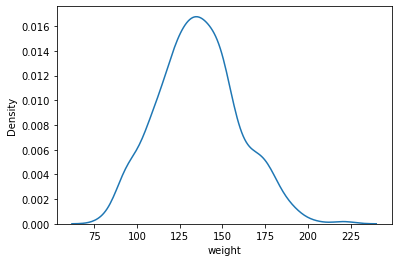

In [28]:
# show distribution using kdeplot
# sns.kdeplot(data=df, x="height", log_scale=True)
# sns.kdeplot(data=df, x="weight", log_scale=True)
sns.kdeplot(data=df, x="weight")
plt.show()

<AxesSubplot:xlabel='height', ylabel='Density'>

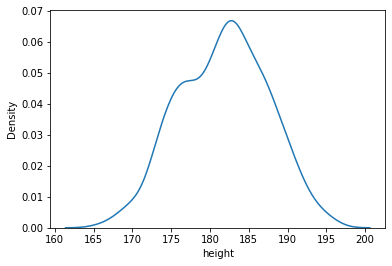

In [29]:
# show distribution using kdeplot
sns.kdeplot(data=df, x="height")

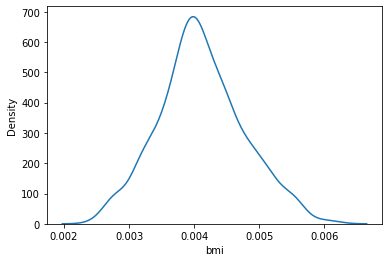

In [30]:
# show distribution using kdeplot
sns.kdeplot(data=df, x="bmi")
plt.show()

<AxesSubplot:xlabel='age', ylabel='Density'>

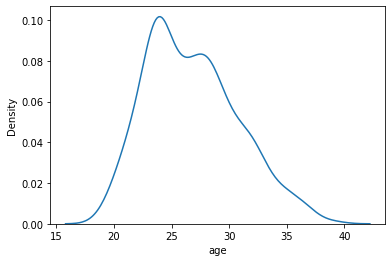

In [31]:
sns.kdeplot(data=df, x="age")

<AxesSubplot:xlabel='win_ratio', ylabel='Density'>

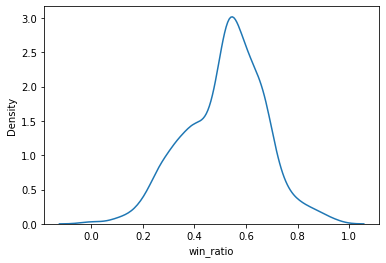

In [32]:
sns.kdeplot(data=df, x="win_ratio")

### Data scaling and normalisation

In [33]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
scaler = StandardScaler()
# scaler = RobustScaler()

scaled_df = df.copy(deep=True)

# scale numerical columns
scaled_df[["height", "weight", "bmi", "age", "win_ratio"]] = scaler.fit_transform(scaled_df[["height", "weight", "bmi", "age", "win_ratio"]])

# show head of scaled dataframe
scaled_df.head()

,height,weight,bmi,age,win_ratio,technique_abisetaoshi,technique_ashitori,technique_fusen,technique_hatakikomi,technique_hikiotoshi,technique_katasukashi,technique_ketaguri,technique_kimedashi,technique_kirikaeshi,technique_kotenage,technique_kubinage,technique_makiotoshi,technique_okuridashi,technique_okuritaoshi,technique_oshidashi,technique_oshitaoshi,technique_shitatehineri,technique_shitatenage,technique_sotogake,technique_sukuinage,technique_tottari,technique_tsukidashi,technique_tsukiotoshi,technique_tsukitaoshi,technique_tsuridashi,technique_uchigake,technique_uchimuso,technique_unknown,technique_utchari,technique_uwatedashinage,technique_uwatehineri,technique_uwatenage,technique_watashikomi,technique_yorikiri,technique_yoritaoshi,association_Ajigawa,association_Araiso,association_Arashio,association_Asahiyama,association_Chiganoura,association_Dewanoumi,association_Fujishima,association_Futagoyama,association_Hakkaku,association_Hanakago,association_Hanaregoma,association_Irumagawa,association_Isegahama,association_Isenoumi,association_Izutsu,association_Kagamiyama,association_Kasugano,association_Kasugayama,association_Kataonami,association_Kimigahama,association_Kiriyama,association_Kise,association_Kitanoumi,association_Kokonoe,association_Magaki,association_Matsugane,association_Michinoku,association_Mihogaseki,association_Minezaki,association_Miyagino,association_Musashigawa,association_Nakadachi,association_Naruto,association_Nishikijima,association_Nishonoseki,association_Oguruma,association_Oitekaze,association_Onoe,association_Onogawa,association_Onomatsu,association_Oshima,association_Oshiogawa,association_Otake,association_Sadogatake,association_Sakaigawa,association_Sanoyama,association_Shikoroyama,association_Taiho,association_Takadagawa,association_Takanohana,association_Takasago,association_Takashima,association_Tamanoi,association_Tatsunami,association_Tokitsukaze,association_Tomozuna,association_Wakamatsu,rank_J1e,result
0,-0.657212,-1.604495,-1.558978,-0.954295,0.961633,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1,-2.230431,-1.012367,-0.286789,-0.954295,0.089851,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,-1.356420,-1.181546,-0.830824,0.805176,-0.595120,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,-1.706025,-0.970072,-0.443126,-0.702942,-0.781930,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,0.216799,0.679429,0.661336,0.302470,-0.128094,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


### EDA after data normalisation

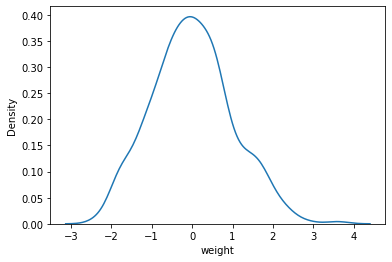

In [34]:
# show distribution using kdeplot
sns.kdeplot(data=scaled_df, x="weight")
plt.show()

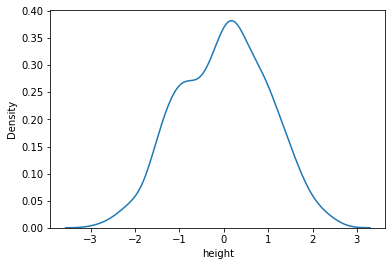

In [35]:
sns.kdeplot(data=scaled_df, x="height")
plt.show()

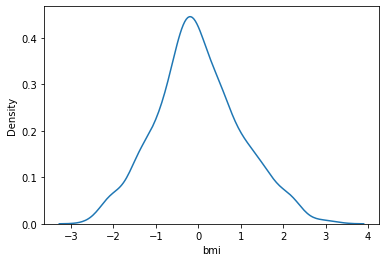

In [36]:
sns.kdeplot(data=scaled_df, x="bmi")
plt.show()

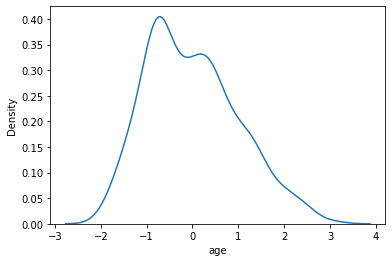

In [37]:
sns.kdeplot(data=scaled_df, x="age")
plt.show()

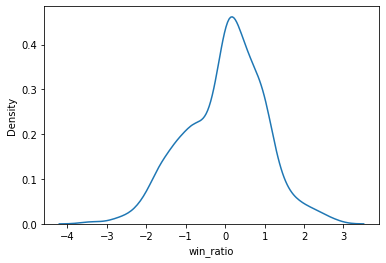

In [38]:
sns.kdeplot(data=scaled_df, x="win_ratio")
plt.show()

## Modelling

### Baseline models

In [39]:
# import common modules for modelling
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
# import sklearn
# sklearn. __version__

In [40]:
data = scaled_df.copy(deep=True)
# data = df.copy(deep=True)

# split dataset in features and target variable
feature_cols = [x for x in data.columns if x != "result"]
target_col = "result"
X = data[feature_cols] # Features
y = data[target_col] # Target variable

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

#### Logistic Regression

SCORE: 0.681564
              precision    recall  f1-score   support

           0       0.69      0.68      0.69        91
           1       0.67      0.68      0.68        88

    accuracy                           0.68       179
   macro avg       0.68      0.68      0.68       179
weighted avg       0.68      0.68      0.68       179



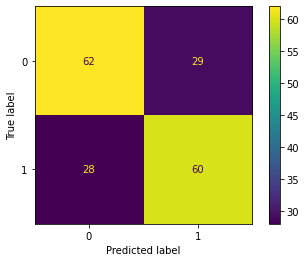

In [41]:
# import the class
from sklearn.linear_model import LogisticRegression

# data = scaled_df.copy(deep=True)
# # data = df.copy(deep=True)

# # split dataset in features and target variable
# feature_cols = [x for x in data.columns if x != "result"]
# target_col = "result"
# X = data[feature_cols] # Features
# y = data[target_col] # Target variable

# # split X and y into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

# instantiate the model (using the default parameters)
model_logreg = LogisticRegression(penalty='l2', solver='newton-cg')

# fit the model with data
model_logreg.fit(X_train, y_train)

# predict
y_pred = model_logreg.predict(X_test)

# calculate and print accuracy score
score = model_logreg.score(X_test, y_test)
print("SCORE: %f" % (score))

# classification report
print(classification_report(y_test, y_pred, target_names=["0", "1"]))

# plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [42]:
# !pip install --upgrade scikit-learn

In [43]:
# %load_ext autoreload
# %autoreload 2

#### Naive Bayes

SCORE: 0.575419
              precision    recall  f1-score   support

           0       0.55      0.85      0.67        91
           1       0.65      0.30      0.41        88

    accuracy                           0.58       179
   macro avg       0.60      0.57      0.54       179
weighted avg       0.60      0.58      0.54       179



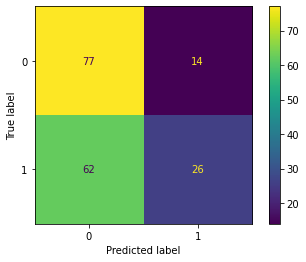

In [44]:
# naive bayes
from sklearn.naive_bayes import GaussianNB

# split dataset in features and target variable
# X, y = data.iloc[:,:-1], df.iloc[:,-1]

# split X and y into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

# instantiate the model
model_gnb = GaussianNB()

# fit the model with data
model_gnb.fit(X_train, y_train)

# predict
y_pred = model_gnb.predict(X_test)

# calculate and print accuracy score
score = model_gnb.score(X_test, y_test)
print("SCORE: %f" % (score))

# classification report
print(classification_report(y_test, y_pred, target_names=["0", "1"]))

# plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

#### SVM

SCORE: 0.670391
              precision    recall  f1-score   support

           0       0.67      0.70      0.68        91
           1       0.67      0.64      0.65        88

    accuracy                           0.67       179
   macro avg       0.67      0.67      0.67       179
weighted avg       0.67      0.67      0.67       179



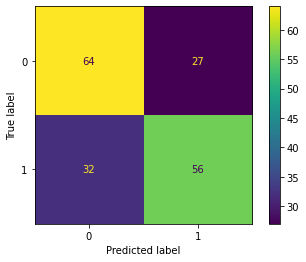

In [45]:
# svm
from sklearn import svm

# split dataset in features and target variable
# X, y = data.iloc[:,:-1],df.iloc[:,-1]

# split X and y into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

# instantiate the model
model_svm = svm.SVC(kernel='linear')

# fit the model with data
model_svm.fit(X_train, y_train)

# predict
y_pred = model_svm.predict(X_test)

# calculate and print accuracy score
score = model_svm.score(X_test, y_test)
print("SCORE: %f" % (score))

# classification report
print(classification_report(y_test, y_pred, target_names=["0", "1"]))

# plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

#### XGBoost

SCORE: 0.888268
              precision    recall  f1-score   support

           0       0.86      0.93      0.89        91
           1       0.93      0.84      0.88        88

    accuracy                           0.89       179
   macro avg       0.89      0.89      0.89       179
weighted avg       0.89      0.89      0.89       179



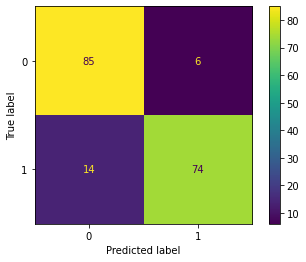

In [46]:
import xgboost as xgb

# split dataset in features and target variable
# X, y = data.iloc[:,:-1], df.iloc[:,-1]

# split X and y into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

# instantiate the model
model_xgb = xgb.XGBClassifier()

# fit the model with data
model_xgb.fit(X_train, y_train)

# predict
y_pred = model_xgb.predict(X_test)

# calculate and print accuracy score
score = model_xgb.score(X_test, y_test)
print("SCORE: %f" % (score))

# classification report
print(classification_report(y_test, y_pred, target_names=["0", "1"]))

# plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [47]:
# demonstrate a few predictions
print("Predictions: ", y_pred[:5])
print("Actual:      ", y_test.values[:5])
X_test.head(5)

Predictions:  [0 0 1 0 1]
Actual:       [1 1 1 0 1]


,height,weight,bmi,age,win_ratio,technique_abisetaoshi,technique_ashitori,technique_fusen,technique_hatakikomi,technique_hikiotoshi,technique_katasukashi,technique_ketaguri,technique_kimedashi,technique_kirikaeshi,technique_kotenage,technique_kubinage,technique_makiotoshi,technique_okuridashi,technique_okuritaoshi,technique_oshidashi,technique_oshitaoshi,technique_shitatehineri,technique_shitatenage,technique_sotogake,technique_sukuinage,technique_tottari,technique_tsukidashi,technique_tsukiotoshi,technique_tsukitaoshi,technique_tsuridashi,technique_uchigake,technique_uchimuso,technique_unknown,technique_utchari,technique_uwatedashinage,technique_uwatehineri,technique_uwatenage,technique_watashikomi,technique_yorikiri,technique_yoritaoshi,association_Ajigawa,association_Araiso,association_Arashio,association_Asahiyama,association_Chiganoura,association_Dewanoumi,association_Fujishima,association_Futagoyama,association_Hakkaku,association_Hanakago,association_Hanaregoma,association_Irumagawa,association_Isegahama,association_Isenoumi,association_Izutsu,association_Kagamiyama,association_Kasugano,association_Kasugayama,association_Kataonami,association_Kimigahama,association_Kiriyama,association_Kise,association_Kitanoumi,association_Kokonoe,association_Magaki,association_Matsugane,association_Michinoku,association_Mihogaseki,association_Minezaki,association_Miyagino,association_Musashigawa,association_Nakadachi,association_Naruto,association_Nishikijima,association_Nishonoseki,association_Oguruma,association_Oitekaze,association_Onoe,association_Onogawa,association_Onomatsu,association_Oshima,association_Oshiogawa,association_Otake,association_Sadogatake,association_Sakaigawa,association_Sanoyama,association_Shikoroyama,association_Taiho,association_Takadagawa,association_Takanohana,association_Takasago,association_Takashima,association_Tamanoi,association_Tatsunami,association_Tokitsukaze,association_Tomozuna,association_Wakamatsu,rank_J1e
514,0.041997,-0.843187,-0.930938,-0.451589,0.525742,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
550,0.216799,0.552545,0.523762,1.307882,-1.217821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
633,-0.132805,-0.166469,-0.121313,1.056529,-1.653712,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
637,-1.356420,-0.462533,0.031496,-0.200236,0.089851,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
402,-1.706025,-0.674007,-0.079747,-1.708355,0.089851,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [48]:
# demonstrate some more predictions
print("Predictions: ", y_pred[:20])
print("Actual:      ", y_test.values[:20])
# X_test.head(10)

Predictions:  [0 0 1 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 1 1]
Actual:       [1 1 1 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1]


#### Random Forest

SCORE: 0.905028
              precision    recall  f1-score   support

           0       0.89      0.93      0.91        91
           1       0.93      0.88      0.90        88

    accuracy                           0.91       179
   macro avg       0.91      0.90      0.90       179
weighted avg       0.91      0.91      0.90       179



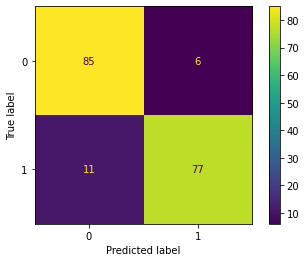

In [49]:
# random forest
from sklearn.ensemble import RandomForestClassifier

# split dataset in features and target variable
# X, y = data.iloc[:,:-1], df.iloc[:,-1]

# split X and y into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

# instantiate the model
model_rf = RandomForestClassifier(random_state=RANDOM_STATE)

# fit the model with data
model_rf.fit(X_train, y_train)

# predict
y_pred = model_rf.predict(X_test)

# calculate and print accuracy score
score = model_rf.score(X_test, y_test)
print("SCORE: %f" % (score))

# classification report
print(classification_report(y_test, y_pred, target_names=["0", "1"]))

# plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

#### Feature importance (Random Forest)

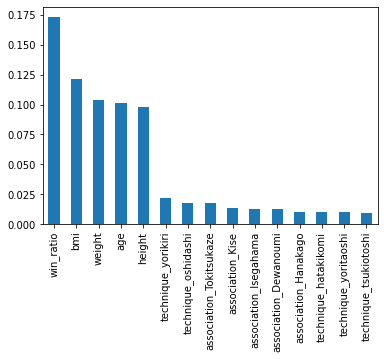

In [50]:
# calculate/extract feature importance metrics
importances = model_rf.feature_importances_
# std = np.std([x.feature_importances_ for x in model_rf.estimators_], axis=0)

# extract feature names
feature_names = data.iloc[:,:-1].columns

# make series out of feature importance metrics
clf_importances = pd.Series(importances, index=feature_names)

# top 15 important feature
(
    clf_importances
    .sort_values(ascending=False)
    [:15]
    .plot
    .bar()
)
plt.show()

In [51]:
# clf_importances.shape

# clf_importances.to_csv("clf_importances.csv", index=False)

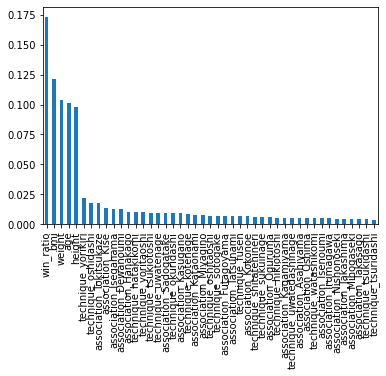

In [52]:
# feature importance
(
    clf_importances
    .sort_values(ascending=False)
    [:45]
    .plot
    .bar()
)
plt.show()

#### Decision tree

SCORE: 0.865922
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        91
           1       0.87      0.85      0.86        88

    accuracy                           0.87       179
   macro avg       0.87      0.87      0.87       179
weighted avg       0.87      0.87      0.87       179



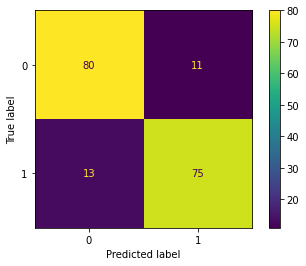

In [53]:
# decision tree
from sklearn.tree import DecisionTreeClassifier

# split dataset in features and target variable
# X, y = data.iloc[:,:-1],df.iloc[:,-1]

# split X and y into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

# instantiate the model
model_tree = DecisionTreeClassifier()

# fit the model with data
model_tree.fit(X_train, y_train)

# predict
y_pred = model_tree.predict(X_test)

# calculate and print accuracy score
score = model_tree.score(X_test, y_test)
print("SCORE: %f" % (score))

# classification report
print(classification_report(y_test, y_pred, target_names=["0", "1"]))

# plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

#### Feature importance (Decision Tree)

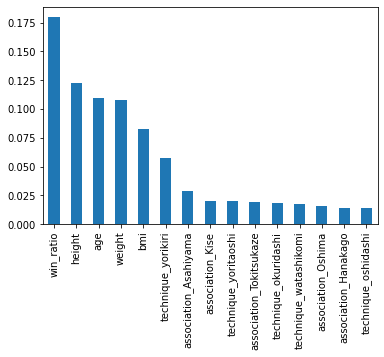

In [54]:
# calculate/extract feature importance metrics
importances = model_tree.feature_importances_
# std = np.std([x.feature_importances_ for x in model_tree.estimators_], axis=0)

# extract feature names
feature_names = data.iloc[:,:-1].columns

# make series out of feature importance metrics
clf_importances = pd.Series(importances, index=feature_names)

# top 15 important feature
(
    clf_importances
    .sort_values(ascending=False)
    [:15]
    .plot
    .bar()
)
plt.show()


### Parameter tuning

In [55]:
# import common modules for parameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

#### Parameter tuning (Logistic Regression)

In [56]:
# get available parameters and the default values
# for LogisticRegression estimator
print(LogisticRegression().get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


{'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}
SCORE: 0.681564
              precision    recall  f1-score   support

           0       0.69      0.68      0.69        91
           1       0.67      0.68      0.68        88

    accuracy                           0.68       179
   macro avg       0.68      0.68      0.68       179
weighted avg       0.68      0.68      0.68       179



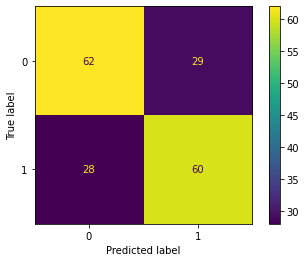

In [57]:
# Grid search for LogisticRegression

# data = scaled_df.copy(deep=True)
# # data = df.copy(deep=True)

# # split dataset in features and target variable
# feature_cols = [x for x in data.columns if x != "result"]
# target_col = "result"
# X = data[feature_cols] # Features
# y = data[target_col] # Target variable

# # split X and y into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

# setup grid search params
params = {
    "solver": ['newton-cg', 'lbfgs', 'liblinear'],
    "penalty": ['l2'],
    "C": [0.001, 0.01, 0.1, 1, 10, 100],
    }


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=RANDOM_STATE)

# setup grid search
model_logreg = GridSearchCV(
    LogisticRegression(random_state=RANDOM_STATE, max_iter=10000),
    param_grid=params,
    scoring='accuracy',
    cv=cv,
    n_jobs=-1,
    error_score=0
    )

# fit the model with data
model_logreg.fit(X_train, y_train)

# print best model parameters
print(model_logreg.best_params_)

# predict
y_pred = model_logreg.predict(X_test)

# calculate and print accuracy score
score = model_logreg.score(X_test, y_test)
print("SCORE: %f" % (score))

# classification report
print(classification_report(y_test, y_pred, target_names=["0", "1"]))

# plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()


#### Parameter tuning (XGBosst)

In [58]:
# get available parameters and the default values
# for XGBClassifier estimator
print(xgb.XGBClassifier().get_params())

{'objective': 'binary:logistic', 'use_label_encoder': False, 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'gamma': None, 'gpu_id': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'n_estimators': 100, 'n_jobs': None, 'num_parallel_tree': None, 'predictor': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


{'verbosity': None, 'validate_parameters': None, 'use_label_encoder': False, 'tree_method': 'hist', 'subsample': None, 'scale_pos_weight': None, 'sampling_method': None, 'reg_lambda': 6.4, 'reg_alpha': 0.1, 'random_state': None, 'predictor': None, 'objective': 'binary:logistic', 'num_parallel_tree': None, 'n_jobs': None, 'n_estimators': 80, 'monotone_constraints': None, 'missing': nan, 'min_child_weight': 1, 'max_leaves': None, 'max_depth': 7, 'max_delta_step': None, 'max_cat_to_onehot': None, 'max_bin': None, 'learning_rate': 0.6, 'interaction_constraints': None, 'importance_type': None, 'grow_policy': 'lossguide', 'gpu_id': None, 'gamma': 0, 'eval_metric': 'auc', 'enable_categorical': False, 'early_stopping_rounds': None, 'colsample_bytree': None, 'colsample_bynode': None, 'colsample_bylevel': None, 'callbacks': None, 'booster': 'gbtree', 'base_score': None}
SCORE: 0.905028
              precision    recall  f1-score   support

           0       0.86      0.97      0.91        91
  

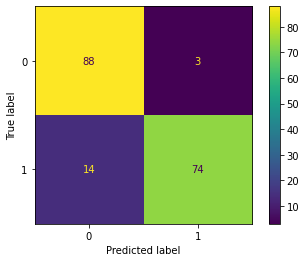

In [59]:
# Grid search for XGBClassifier

# data = scaled_df.copy(deep=True)
# # data = df.copy(deep=True)

# # split dataset in features and target variable
# feature_cols = [x for x in data.columns if x != "result"]
# target_col = "result"
# X = data[feature_cols] # Features
# y = data[target_col] # Target variable


# # split X and y into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

model_init_xgb = xgb.XGBClassifier(
    objective='binary:logistic',
    booster='gbtree',
    eval_metric='auc',
    tree_method='hist',
    grow_policy='lossguide',
    use_label_encoder=False
)

# setup grid search params
params_grid = {
    'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
    'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
    'max_depth': [3,4,5,6,7,8,9,10,11,12,13,14],
    'n_estimators': [50,65,80,100,115,130,150,250,500],
    'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
    'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
    'subsample': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 5, 10],
    'colsample_bytree': [0.6, 0.8, 1.0],
    }

# include default params into grid params
default_params = model_init_xgb.get_params()
params = {}
for k,v in default_params.items():
    param_list = [v]
    if params_grid.get(k):
        param_list.extend(params_grid.get(k))
    params[k] = param_list


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=RANDOM_STATE)

# to use random search instead of grid search
# comment out grid search block and uncomment
# random search block below

# # setup grid search
# model_xgb = GridSearchCV(
#     model_init_xgb,
#     param_grid=params,
#     scoring='accuracy',
#     cv=cv,
#     )


# use random search instead of grid search
# as xgboost grid search would take long time to run
model_xgb = RandomizedSearchCV(
    model_init_xgb,
    param_distributions=params,
    n_iter=20,
    scoring='accuracy',
    n_jobs=4,
    cv=cv,
    random_state=RANDOM_STATE
    )

# fit the model with data
model_xgb.fit(X_train, y_train)

# print best model parameters
print(model_xgb.best_params_)

# predict
y_pred = model_xgb.predict(X_test)

# calculate and print accuracy score
score = model_xgb.score(X_test, y_test)
print("SCORE: %f" % (score))

# classification report
print(classification_report(y_test, y_pred, target_names=["0", "1"]))

# plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

#### Parameter tuning (Naive Bayes)

In [60]:
# get available parameters and the default values
# for GaussianNB estimator
print(GaussianNB().get_params())

{'priors': None, 'var_smoothing': 1e-09}


In [61]:
# As there isn't a hyper-parameter to tune, parameter tuning will be skipped for naive bayes

#### Parameter tuning (SVM)

In [62]:
# get available parameters and the default values
# for svm estimator
print(svm.SVC().get_params())

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


{'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
SCORE: 0.804469
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        91
           1       0.80      0.81      0.80        88

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



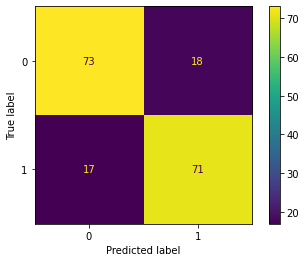

In [63]:
# Grid search for svm

# data = scaled_df.copy(deep=True)
# # data = df.copy(deep=True)

# # split dataset in features and target variable
# feature_cols = [x for x in data.columns if x != "result"]
# target_col = "result"
# X = data[feature_cols] # Features
# y = data[target_col] # Target variable

# # split X and y into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

# setup grid search params
params = {
    "kernel": ['poly', 'rbf', 'sigmoid'],
    "C": [50, 10, 1.0, 0.1, 0.01],
    "gamma": ['scale'],
    }


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=RANDOM_STATE)

# setup grid search
model_svm = GridSearchCV(
    svm.SVC(),
    param_grid=params,
    scoring='accuracy',
    cv=cv,
    n_jobs=-1,
    error_score=0
    )

# fit the model with data
model_svm.fit(X_train, y_train)

# print best model parameters
print(model_svm.best_params_)

# predict
y_pred = model_svm.predict(X_test)

# calculate and print accuracy score
score = model_svm.score(X_test, y_test)
print("SCORE: %f" % (score))

# classification report
print(classification_report(y_test, y_pred, target_names=["0", "1"]))

# plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

#### Parameter tuning (Random Forest)

In [64]:
# get available parameters and the default values
# for RandomForestClassifier estimator
print(RandomForestClassifier().get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


{'criterion': 'gini', 'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 50}
SCORE: 0.905028
              precision    recall  f1-score   support

           0       0.89      0.93      0.91        91
           1       0.93      0.88      0.90        88

    accuracy                           0.91       179
   macro avg       0.91      0.90      0.90       179
weighted avg       0.91      0.91      0.90       179



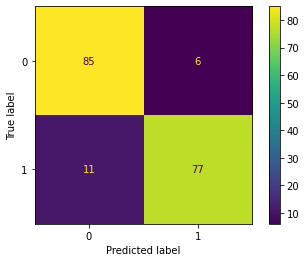

In [65]:
# Grid search for RandomForestClassifier

# data = scaled_df.copy(deep=True)
# # data = df.copy(deep=True)

# # split dataset in features and target variable
# feature_cols = [x for x in data.columns if x != "result"]
# target_col = "result"
# X = data[feature_cols] # Features
# y = data[target_col] # Target variable

# # split X and y into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

# setup grid search params
params = {
        'n_estimators': [10, 20, 30, 50, 100, 1000],
        'criterion': ["gini", "entropy"],
        'min_samples_leaf': [1, 2, 4, 20],
        'max_features': ['sqrt', 'log2'],
    }

# setup grid search
model_rf = GridSearchCV(
    RandomForestClassifier(random_state=0),
    param_grid=params,
    scoring='accuracy',
    cv=5
    )

# fir the model with data
model_rf.fit(X_train, y_train)

# print best model parameters
print(model_rf.best_params_)

# predict
y_pred = model_rf.predict(X_test)

# calculate and print accuracy score
score = model_rf.score(X_test, y_test)
print("SCORE: %f" % (score))

# classification report
print(classification_report(y_test, y_pred, target_names=["0", "1"]))

# plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

#### Parameter tuning (Decision Tree)

In [66]:
# get available parameters and the default values
# for DecisionTreeClassifier estimator
print(DecisionTreeClassifier().get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


{'criterion': 'gini', 'max_depth': None}
SCORE: 0.865922
              precision    recall  f1-score   support

           0       0.85      0.90      0.87        91
           1       0.89      0.83      0.86        88

    accuracy                           0.87       179
   macro avg       0.87      0.87      0.87       179
weighted avg       0.87      0.87      0.87       179



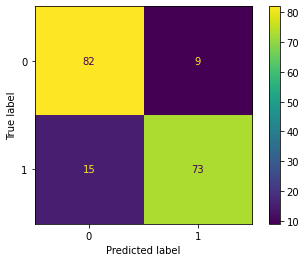

In [67]:
# Grid search for DecisionTreeClassifier

# data = scaled_df.copy(deep=True)
# # data = df.copy(deep=True)

# # split dataset in features and target variable
# feature_cols = [x for x in data.columns if x != "result"]
# target_col = "result"
# X = data[feature_cols] # Features
# y = data[target_col] # Target variable

# # split X and y into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

# setup grid search params
params = {
    "criterion": ['gini', 'entropy'],
    "max_depth": [None, 2, 4, 6, 8, 10, 12]
    }

# Stratified K-Fold 10 times with different randomization in each repetition.
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=RANDOM_STATE)

# setup grid search
model_tree = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid=params,
    scoring='accuracy',
    cv=cv,
    n_jobs=-1,
    error_score=0,
    )

# fit the model with data
model_tree.fit(X_train, y_train)

# print best model parameters
print(model_tree.best_params_)

# predict
y_pred = model_tree.predict(X_test)

# calculate and print accuracy score
score = model_tree.score(X_test, y_test)
print("SCORE: %f" % (score))

# classification report
print(classification_report(y_test, y_pred, target_names=["0", "1"]))

# plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

### Model comparison and evaluation

In [68]:
# model comparison

models = {
    "logistic_regression": model_logreg,
    "naive_bayes": model_gnb,
    "xgboost": model_xgb,
    "svm": model_svm,
    "random_forest": model_rf,
    "decision_tree": model_tree,
}

dfs = []
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, target_names=["0", "1"], output_dict=True)
    df_model_report = pd.DataFrame(report)
    df_model_report["model_identifier"] = model_name[:]
    df_model_report.index.name = "metric"
    df_model_report.reset_index(drop=False, inplace=True)
    dfs.append(df_model_report)
    del df_model_report

df_model_comparison = pd.concat(dfs)
df_model_comparison.reset_index(drop=True, inplace=True)
df_model_comparison.to_csv("all_results.csv", index=False)


In [69]:
# show the top models who overall performs best
# in terms of f1-score output
(
    df_model_comparison
    .loc[df_model_comparison['metric'] == "f1-score"]
    .sort_values(by="accuracy", ascending=False)
    .head(10)
)

,metric,0,1,accuracy,macro avg,weighted avg,model_identifier
10,f1-score,0.911917,0.896970,0.905028,0.904443,0.904569,xgboost
18,f1-score,0.909091,0.900585,0.905028,0.904838,0.904909,random_forest
22,f1-score,0.872340,0.858824,0.865922,0.865582,0.865695,decision_tree
14,f1-score,0.806630,0.802260,0.804469,0.804445,0.804481,svm
2,f1-score,0.685083,0.677966,0.681564,0.681524,0.681584,logistic_regression
6,f1-score,0.669565,0.406250,0.575419,0.537908,0.540114,naive_bayes


In [70]:
# show the top models who predicts the winner best
# in terms of f1-score output
(
    df_model_comparison
    .loc[df_model_comparison['metric'] == "f1-score"]
    .sort_values(by="1", ascending=False)
    .head(10)
)

,metric,0,1,accuracy,macro avg,weighted avg,model_identifier
18,f1-score,0.909091,0.900585,0.905028,0.904838,0.904909,random_forest
10,f1-score,0.911917,0.896970,0.905028,0.904443,0.904569,xgboost
22,f1-score,0.872340,0.858824,0.865922,0.865582,0.865695,decision_tree
14,f1-score,0.806630,0.802260,0.804469,0.804445,0.804481,svm
2,f1-score,0.685083,0.677966,0.681564,0.681524,0.681584,logistic_regression
6,f1-score,0.669565,0.406250,0.575419,0.537908,0.540114,naive_bayes


In [71]:
# show the top models who predicts the loser best
# in terms of f1-score output
(
    df_model_comparison
    .loc[df_model_comparison['metric'] == "f1-score"]
    .sort_values(by="0", ascending=False)
    .head(10)
)

,metric,0,1,accuracy,macro avg,weighted avg,model_identifier
10,f1-score,0.911917,0.896970,0.905028,0.904443,0.904569,xgboost
18,f1-score,0.909091,0.900585,0.905028,0.904838,0.904909,random_forest
22,f1-score,0.872340,0.858824,0.865922,0.865582,0.865695,decision_tree
14,f1-score,0.806630,0.802260,0.804469,0.804445,0.804481,svm
2,f1-score,0.685083,0.677966,0.681564,0.681524,0.681584,logistic_regression
6,f1-score,0.669565,0.406250,0.575419,0.537908,0.540114,naive_bayes


In [72]:
# show the top models who predicts the winner best
# in terms of precision output
(
    df_model_comparison
    .loc[df_model_comparison['metric'] == "precision"]
    .sort_values(by="1", ascending=False)
    .head(10)
)

,metric,0,1,accuracy,macro avg,weighted avg,model_identifier
8,precision,0.862745,0.961039,0.905028,0.911892,0.911068,xgboost
16,precision,0.885417,0.927711,0.905028,0.906564,0.906209,random_forest
20,precision,0.845361,0.890244,0.865922,0.867802,0.867426,decision_tree
12,precision,0.811111,0.797753,0.804469,0.804432,0.804544,svm
0,precision,0.688889,0.674157,0.681564,0.681523,0.681647,logistic_regression
4,precision,0.553957,0.650000,0.575419,0.601978,0.601174,naive_bayes


In [73]:
# show the top models who predicts the winner best
# in terms of recall output
(
    df_model_comparison
    .loc[df_model_comparison['metric'] == "recall"]
    .sort_values(by="1", ascending=False)
    .head(10)
)

,metric,0,1,accuracy,macro avg,weighted avg,model_identifier
17,recall,0.934066,0.875000,0.905028,0.904533,0.905028,random_forest
9,recall,0.967033,0.840909,0.905028,0.903971,0.905028,xgboost
21,recall,0.901099,0.829545,0.865922,0.865322,0.865922,decision_tree
13,recall,0.802198,0.806818,0.804469,0.804508,0.804469,svm
1,recall,0.681319,0.681818,0.681564,0.681568,0.681564,logistic_regression
5,recall,0.846154,0.295455,0.575419,0.570804,0.575419,naive_bayes


In [74]:
# show the top models who predicts the winner best
# in terms of accuracy output
# (
#     df_model_comparison
#     .loc[df_model_comparison['metric'] == "acc"]
#     .sort_values(by="1", ascending=False)
#     .head(10)
# )

In [75]:
# pip list command

In [76]:
!pip list

Package                            Version
---------------------------------- -------------------
alabaster                          0.7.12
anaconda-client                    1.7.2
anaconda-navigator                 2.0.3
anaconda-project                   0.8.3
AnyQt                              0.0.13
applaunchservices                  0.2.1
appnope                            0.1.0
appscript                          1.1.1
argh                               0.26.2
argon2-cffi                        20.1.0
asn1crypto                         1.4.0
astroid                            2.4.2
astropy                            4.0.2
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              20.3.0
autopep8                           1.5.4
Babel                              2.8.1
backcall                           0.2.0
backports.functools-lru-cache      1.6.4
backports.shutil-get-terminal-size 1.0.0
backports.tempfile                 1.